In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
pd.options.display.max_columns = 100

In [39]:
df = pd.read_csv('./model_data/winni_reports.csv', index_col = 0)
df.head()

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,time_caught_bucket
0,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,False,6:20,9:00,lockes,160.0,8,6,"[5, 7)"
1,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
2,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,12.8,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
3,2015,2015-08-27,65.0,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,False,6:20,9:00,lockes,160.0,8,8,"[7, 9)"
4,2015,2015-08-28,65.0,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,False,7:15,10:30,diamond,195.0,8,7,"[7, 9)"


In [51]:
df.loc[(df['weather'] == 'windy') & (df['location'] == 'saunders bay')]

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,time_caught_bucket
5,2015,2015-04-26,52.235294,39.4,0,no_wind,windy,saunders bay,8:00,salmon,18.0,2.0,False,8:00,11:00,saunders bay,180.0,4,8,"[7, 9)"
6,2015,2015-04-26,52.235294,39.4,0,no_wind,windy,saunders bay,8:15,salmon,19.0,2.0,False,8:00,11:00,saunders bay,180.0,4,8,"[7, 9)"
7,2015,2015-04-26,52.235294,39.4,0,no_wind,windy,saunders bay,8:30,salmon,18.0,2.0,False,8:00,11:00,saunders bay,180.0,4,8,"[7, 9)"


In [53]:
df.loc[(df['weather'] == 'sunny')]

,year,date,air_temp_f,water_temp_f,wind_speed_mph,wind_dir,weather,location,time_caught,fish_type,fish_length_in,water_depth_ft,skunked,lines_in,lines_out,general_loc,duration_min,month,hour,time_caught_bucket
0,2015,2015-08-27,65.000000,76.3,8,nw,sunny,north of lockes,6:20,salmon,18.0,20.0,False,6:20,9:00,lockes,160.0,8,6,"[5, 7)"
1,2015,2015-08-27,65.000000,76.3,8,nw,sunny,north of lockes,7:00,rainbow,16.0,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
2,2015,2015-08-27,65.000000,76.3,8,nw,sunny,north of lockes,7:15,smallmouth,12.8,20.0,False,6:20,9:00,lockes,160.0,8,7,"[7, 9)"
3,2015,2015-08-27,65.000000,76.3,8,nw,sunny,north of lockes,8:40,salmon,10.0,37.0,False,6:20,9:00,lockes,160.0,8,8,"[7, 9)"
4,2015,2015-08-28,65.000000,76.3,8,nw,sunny,north of diamond,7:45,rainbow,16.0,43.0,False,7:15,10:30,diamond,195.0,8,7,"[7, 9)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,2021,2021-08-02,63.088608,71.0,14,n,sunny,north of welch,no_time_recorded,no_fish_caught,0.0,0.0,True,11:15,12:00,welch,45.0,8,0,NaN
449,2022,2022-04-12,52.235294,50.0,0,no_wind,sunny,harilla bay,15:30,lake trout,22.0,10.0,False,12:00,16:00,harilla bay,240.0,4,15,"[15, 17)"
451,2022,2022-04-30,52.235294,48.0,10,nw,sunny,harilla bay,12:03,salmon,17.0,10.0,False,10:00,14:00,harilla bay,240.0,4,12,"[11, 13)"
452,2022,2022-05-01,68.000000,48.0,0,no_wind,sunny,harilla bay,12:24,rainbow,17.0,15.0,False,10:30,14:00,harilla bay,210.0,5,12,"[11, 13)"


In [40]:
location = 'diamond'

In [47]:
df.loc[df['location'].str.contains(f'{location}', case=False)].value_counts(['fish_type', 'location'], normalize=True).to_frame()

,,0
fish_type,location,
salmon,north of diamond,0.479675
lake trout,north of diamond,0.146341
rainbow,north of diamond,0.146341
no_fish_caught,north of diamond,0.089431
salmon,diamond,0.048780
white perch,north of diamond,0.032520
rainbow,diamond,0.024390
lake trout,east of diamond,0.008130
no_fish_caught,diamond,0.008130


In [48]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            444, 445, 446, 447, 448, 449, 450, 451, 452, 453],
           dtype='int64', length=454)

          hours
activity       
Work          8
Sleep        10
Play          6


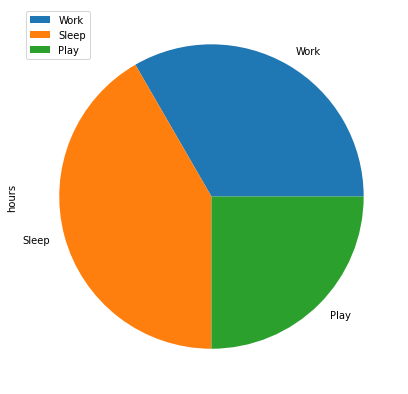

In [34]:
import pandas as pd

df = pd.DataFrame({'activity': ['Work', 'Sleep', 'Play'],
                   'hours': [8, 10, 6]})
df.set_index('activity', inplace=True)
print(df)
#               hours
# activity       
# Work          8
# Sleep        10
# Play          6
plot = df.plot.pie(y='hours', figsize=(7, 7))